# House price regression

The main goal of this project is to estimate the sale price of real estate

## Problem
We got hired by a real estate investor in order to propose him a software solution to estimate quickly the value of housholds. The goal of this application is to scan the whole real estate market in order to indentify undervaluate household.

## Solution
To answer this problem, we propose a regression algorithm that will estimate the value of household given some specific properties. Then by comparing the estimate value against the market value, we'll be able to spot investment opportunities

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


Bad key "text.dvipnghack" on line 127 in
/home/benoit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "nbagg.transparent" on line 433 in
/home/benoit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 516 in
/home/benoit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_a

### Data import, cleaning and analysis
The first step would be to import the data in order to prepare it for the algorithm.
To do so, we'll start by importing the data and list every feature

In [3]:
data = pd.read_csv('train.csv')
for name,dtype in zip(data.columns, data.dtypes):
    print(name,": ", dtype, "         Ex: ", data[name].iloc[0], "    Number of NaN: ", data[name].isnull().sum())

Id :  int64          Ex:  1     Number of NaN:  0
MSSubClass :  int64          Ex:  60     Number of NaN:  0
MSZoning :  object          Ex:  RL     Number of NaN:  0
LotFrontage :  float64          Ex:  65.0     Number of NaN:  259
LotArea :  int64          Ex:  8450     Number of NaN:  0
Street :  object          Ex:  Pave     Number of NaN:  0
Alley :  object          Ex:  nan     Number of NaN:  1369
LotShape :  object          Ex:  Reg     Number of NaN:  0
LandContour :  object          Ex:  Lvl     Number of NaN:  0
Utilities :  object          Ex:  AllPub     Number of NaN:  0
LotConfig :  object          Ex:  Inside     Number of NaN:  0
LandSlope :  object          Ex:  Gtl     Number of NaN:  0
Neighborhood :  object          Ex:  CollgCr     Number of NaN:  0
Condition1 :  object          Ex:  Norm     Number of NaN:  0
Condition2 :  object          Ex:  Norm     Number of NaN:  0
BldgType :  object          Ex:  1Fam     Number of NaN:  0
HouseStyle :  object          Ex: 

Given this analysis, we can notice that some features doesn't contain any valuable information
Those features are:
- Id
- ...

In addition of that, we notice that there is many missing values. The job here would be to differanciate missing values (errors in the dataset) from the absence of the concernate feature in the house.

In the first case, we'll remove the row.

In the second case, we'll considere any object that can be absent as added value, and thus replacing NaNs by zero.

In [4]:
data.describe(include=['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [5]:
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
# Object to float comme un bourrin (à faire bien)

for name,dtype in zip(data.columns, data.dtypes):
    if dtype == object:
        data[name] = pd.factorize(data[name])[0]
data.replace(np.nan,0)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         0         65.0     8450       0     -1   
1        2          20         0         80.0     9600       0     -1   
2        3          60         0         68.0    11250       0     -1   
3        4          70         0         60.0     9550       0     -1   
4        5          60         0         84.0    14260       0     -1   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         0         62.0     7917       0     -1   
1456  1457          20         0         85.0    13175       0     -1   
1457  1458          70         0         66.0     9042       0     -1   
1458  1459          20         0         68.0     9717       0     -1   
1459  1460          20         0         75.0     9937       0     -1   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            0            0          0  ...         0      -1     -1   
1            0            0          0  ...         0      -1     -1   
2            1            0          0  ...         0      -1     -1   
3            1            0          0  ...         0      -1     -1   
4            1            0          0  ...         0      -1     -1   
...        ...          ...        ...  ...       ...     ...    ...   
1455         0            0          0  ...         0      -1     -1   
1456         0            0          0  ...         0      -1      0   
1457         0            0          0  ...         0      -1      2   
1458         0            0          0  ...         0      -1     -1   
1459         0            0          0  ...         0      -1     -1   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0              -1        0       2    2008         0              0     208500  
1              -1        0       5    2007         0              0     181500  
2              -1        0       9    2008         0              0     223500  
3              -1        0       2    2006         0              1     140000  
4              -1        0      12    2008         0              0     250000  
...           ...      ...     ...     ...       ...            ...        ...  
1455           -1        0       8    2007         0              0     175000  
1456           -1        0       2    2010         0              0     210000  
1457            0     2500       5    2010         0              0     266500  
1458           -1        0       4    2010         0              0     142125  
1459           -1        0       6    2008         0              0     147500  

[1460 rows x 81 columns]

In [7]:
# Remplacement des nan comme un bourrin (à faire bien)

x = np.nan_to_num(data.iloc[:, 1:len(data.columns)-2].to_numpy())
print(np.isnan(x).any())

False


In [8]:
y = data.iloc[:, len(data.columns)-1].to_numpy()
print(y)

[208500 181500 223500 ... 266500 142125 147500]


In [9]:
# Train test split
train_test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=train_test_ratio, random_state=42)

print("Train: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Train:  (1168, 78) (1168,)
Test:  (292, 78) (292,)


In [10]:
# Scaling
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train folding (cross-val)
n = 10

cv = ShuffleSplit(n_splits=n, test_size=0.3, random_state=0)

print(cv)

ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=None)


In [12]:
# Random prediction function
def random_prediction(x: np.ndarray, reg, n=5):
    size = x.shape[0]-1
    for _ in range(n):
        number = random.randint(0, size)
        y = y_test[number]
        y_hat = int(reg.predict(x[number].reshape(1, -1))[0])
        print("Real price: ", y, " Predicted one: ", y_hat, " Error: ", int((y-y_hat)/y_hat*100), "%")

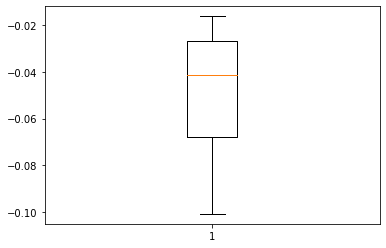

In [13]:
# SVM

parameters = [1]
mse_report = np.zeros((len(parameters), n))

for i, par in enumerate(parameters):
        reg = svm.SVR()
        mse_report[i, :] = cross_val_score(reg, X_train, y_train, cv=cv)
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

In [14]:
king_parameter = 1

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))

MSE:  7859317774.244945
r2 score:  -0.02463931284705123


In [15]:
random_prediction(x=X_test, reg=reg)

Real price:  113000  Predicted one:  164987  Error:  -31 %
Real price:  144500  Predicted one:  164987  Error:  -12 %
Real price:  194000  Predicted one:  165056  Error:  17 %
Real price:  271000  Predicted one:  165034  Error:  64 %
Real price:  337500  Predicted one:  165027  Error:  104 %


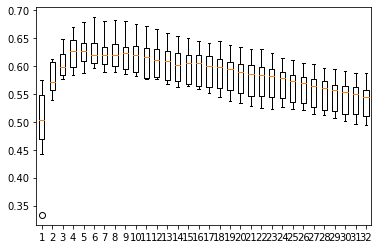

In [36]:
# KNN

parameters = [i for i in range(1, 33)]
mse_report = np.zeros((len(parameters), n))
test_report = np.zeros((len(parameters), 2))

for i, par in enumerate(parameters):
        reg = KNeighborsRegressor(n_neighbors=par, n_jobs=-1)
        mse_report[i, :] = cross_val_score(reg, X_train, y_train, cv=cv)
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_train)
        test_report[i, 0] = mean_squared_error(y_train, y_pred)
        y_pred = reg.predict(X_test)
        test_report[i, 1] = mean_squared_error(y_test, y_pred)
        
        
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)


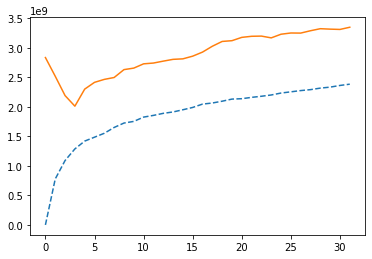

In [37]:
plt.plot(test_report[:, 0], "--")
plt.plot(test_report[:, 1])

In [38]:
king_parameter = 3
print(X_train.shape)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))

(1168, 78)
MSE:  3347604188.833071
r2 score:  0.5635642998212576


In [34]:
random_prediction(x=X_test, reg=reg)

Real price:  280000  Predicted one:  249226  Error:  12 %
Real price:  124500  Predicted one:  133403  Error:  -6 %
Real price:  465000  Predicted one:  251996  Error:  84 %
Real price:  179900  Predicted one:  148232  Error:  21 %
Real price:  144000  Predicted one:  153482  Error:  -6 %


{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 75, 50, 25), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 66, 33), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
{'activation

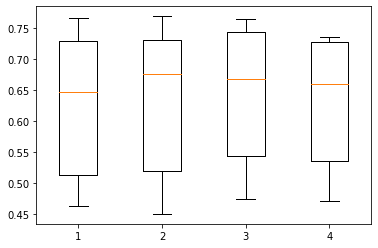

In [19]:
# FWW_NN

parameters = [(100, 75, 50, 25), (100, 66, 33), (100, 50), (100,)]
mse_report = np.zeros((len(parameters), n))

for i, par in enumerate(parameters):
        reg = MLPRegressor(hidden_layer_sizes=par, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
        print(reg.get_params())
        mse_report[i, :] = cross_val_score(reg, X_train, y_train, cv=cv)
        
plt.boxplot(mse_report.T)
mu_perf = np.mean(mse_report, axis=1)
std_perf = np.std(mse_report, axis=1)
max_perf = np.max(mse_report, axis=1)
min_perf = np.min(mse_report, axis=1)

In [20]:
king_parameter = (100, 66, 33)

reg = MLPRegressor(hidden_layer_sizes=king_parameter, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=400, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))

MSE:  1118292328.2959735
r2 score:  0.8542053756138651


/home/benoit/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
random_prediction(x=X_test, reg=reg)

Real price:  239000  Predicted one:  251093  Error:  -4 %
Real price:  124000  Predicted one:  119691  Error:  3 %
Real price:  611657  Predicted one:  446262  Error:  37 %
Real price:  200624  Predicted one:  210919  Error:  -4 %
Real price:  137500  Predicted one:  119094  Error:  15 %
